In [1]:
# Import dependencies
import pandas as pd
import seaborn as sns

# Set options diplay to analyze the entire dataframe
pd.set_option('display.max_columns', None)

# Raw Data: patients.csv

In [2]:
# Import csv file and turn it into dataframe
file_path = '../Resources/patients.csv'
patients_df = pd.read_csv(file_path)
patients_df.sample(n=5)

,Record ID,Survey Timestamp,Hospital o Instituto,Fecha y hora de llenado del formulario,Prueba de para detección de SARS CoV-2 (choice=negativo),Prueba de para detección de SARS CoV-2 (choice=positivo),La prueba realizada fue,"Criterios de inclusión: (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno)",Criterios exclusión (choice=No se cuenta con el expediente),Fecha de nacimiento,Edad,Sexo,¿Al momento de su ingreso se encontraba embarazada?,Fecha de ingreso al hospital,Días de síntomas antes del ingreso,Tipo de síntomas al ingreso:,Motivo de ingreso,Complete?,Survey Timestamp.1,¿Tiene alguna comorbilidad?,Favor de especificar comorbilidad: (choice=Obesidad),Favor de especificar comorbilidad: (choice=Diabetes Mellitus),Favor de especificar comorbilidad: (choice=Hipertensión arterial sistémica),Favor de especificar comorbilidad: (choice=Enfermedad autoinmune sistémicas),Favor de especificar comorbilidad: (choice=Inmunosupresión),Favor de especificar comorbilidad: (choice=Cancer),Favor de especificar comorbilidad: (choice=Tabaquismo),Favor de especificar comorbilidad: (choice=Alcoholismo),Favor de especificar comorbilidad: (choice=EPOC),Favor de especificar comorbilidad: (choice=Enfermedad intersticial pulmonar),Favor de especificar comorbilidad: (choice=Tuberculosis),Favor de especificar comorbilidad: (choice=Asma),Favor de especificar comorbilidad: (choice=Enfermedad cardiovascular),Favor de especificar comorbilidad: (choice=Enfermedad renal crónica),Favor de especificar comorbilidad: (choice=Enfermedad hepática),Favor de especificar comorbilidad: (choice=Enfermedad neurológica),Precisar enfermedad autoinmune: (choice=LES),Precisar enfermedad autoinmune: (choice=AR),Precisar enfermedad autoinmune: (choice=Esclerodermia),Precisar enfermedad autoinmune: (choice=Psoriasis),Precisar enfermedad autoinmune: (choice=Enfermedad intestinal inflamatoria),Precisar enfermedad autoinmune: (choice=Vasculitis sistémicas),Precisar inmunocompromiso: (choice=VIH),Precisar inmunocompromiso: (choice=Trasplante de órgano sólido),"Precisar inmunocompromiso: (choice=Uso de inmunosupresores (corticoesteroides, anticuerpos monoclonales))",Precisar inmunocompromiso: (choice=Inmunodeficiencia primaria),Precisar inmunocompromiso: (choice=Esplenectomia),Paciente en diálisis/hemodiálisis crónica:,Cancer. Precisar: (choice=Cáncer hematológico),Cancer. Precisar: (choice=Cáncer activo (con diagnóstico y/o tratamiento en los últimos 6 meses)),Cancer. Precisar: (choice=Otros),Tabaquismo actual,Nº de años fumando:,Nº cigarrillos al día,COVID-19,Estado de la vacunación covid,Tipo de vacuna covid,¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?,Tipo de vacuna covid de refuerzo (tercera dosis),Fecha aplicación ultima dosis vacuna COVID,¿Tiene usted más de 3 dosis de vacuna contra COVID?,Complete?.1,Survey Timestamp.2,Temperatura °C,Frecuencia Respiratoria,Frecuencia Cardiaca,Saturación por oximetro de pulso,Presión Arterial Sistólica,Presión Arterial Diastólica,Estatura cm,Peso kg,Escala de Glasgow,"Recibio dopamina, noradrenalina o dobutamina?",Dosis de dopamina (DA) o noradrenalina (NA),presion arterial media,PAFI (Valor calculado de la peor PaO2 y FiO2 en las primeras 24 horas),Plaquetas,Bilirrubina total,Creatinina,Albumina al ingreso,Diuresis en las primeras 24 horas (mL),Uso de oxígeno previo a su llegada a urgencias,"¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?",Máximo apoyo respiratorio durante cualquier momento de su hospitalización,Requirió: (choice=Solo VMI),Requirió: (choice=Pronación),Requirió: (choice=ECMO),Fecha de intubación,Fecha de extubación,¿Recibió diálisis peritoneal? en cualquier momento del internamiento,¿Recibió hemodiálisis? En cualquier momento del internamiento,pO2 (peor valor en las primeras 24 horas),FiO2 (peor valor en las primeras 24 horas),Linfocitos absolutos (a su ingreso),Dímero D (ug/mL) (

# Know the DataFrame

In [3]:
initial_shape = patients_df.shape

In [4]:
print(f'Rows: {initial_shape[0]}, Columns: {initial_shape[1]}\n')
for column in patients_df.columns.to_list():
    print(f'\033[1m{column}\033[0m: \033[4m{patients_df[column].notnull().sum()}\033[0m, {patients_df[column].dtype} type')

Rows: 6059, Columns: 116

Record ID: 6059, int64 type
Survey Timestamp: 7, object type
Hospital o Instituto : 6056, object type
Fecha y hora de llenado del formulario: 6059, object type
Prueba de para detección de SARS CoV-2 (choice=negativo): 6059, object type
Prueba de para detección de SARS CoV-2 (choice=positivo): 6059, object type
La prueba realizada fue : 6046, object type
Criterios de inclusión:  (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno): 6059, object type
Criterios exclusión (choice=No se cuenta con el expediente): 6059, object type
Fecha de nacimiento: 6033, object type
Edad : 6033, float64 type
Sexo: 6047, object type
¿Al momento de su ingreso se encontraba embarazada?: 718, object type
Fecha de ingreso al hospital: 6035, object type
Días de síntomas antes del ingreso: 6016, float64 type
Tipo de síntomas al ingreso:: 176, object type
Motivo de ingreso: 167, object type
Complete?: 6059, object type
Survey Timestamp.1: 3, object type
¿Tiene alguna comorbili

## Data Analysis of each column

In [5]:
def column_analysis(df):
    for column in df.columns.to_list():
        null_values = df[column].isna().sum()
        count_data = df[column].value_counts()

        print(f'** \033[1m"{column}"\033[0m **')
        if len(count_data) > 5:
            print(f'Null Values: {null_values}',end='\n\n')
        else:
            print(f'Null Values: {null_values}')
            print(count_data,end='\n\n')

In [6]:
column_analysis(patients_df)

** "Record ID" **
Null Values: 0

** "Survey Timestamp" **
Null Values: 6052

** "Hospital o Instituto " **
Null Values: 3

** "Fecha y hora de llenado del formulario" **
Null Values: 0

** "Prueba de para detección de SARS CoV-2 (choice=negativo)" **
Null Values: 0
No seleccionados    5812
Seleccionados        247
Name: Prueba de para detección de SARS CoV-2 (choice=negativo), dtype: int64

** "Prueba de para detección de SARS CoV-2 (choice=positivo)" **
Null Values: 0
Seleccionados       5808
No seleccionados     251
Name: Prueba de para detección de SARS CoV-2 (choice=positivo), dtype: int64

** "La prueba realizada fue " **
Null Values: 13
PCR         5836
antígeno     210
Name: La prueba realizada fue , dtype: int64

** "Criterios de inclusión:  (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno)" **
Null Values: 0
Seleccionados       5577
No seleccionados     482
Name: Criterios de inclusión:  (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno), dtype: int64

** "Complete?.1" **
Null Values: 0
Complete      5790
Incomplete     144
Unverified     125
Name: Complete?.1, dtype: int64

** "Survey Timestamp.2" **
Null Values: 6050

** "Temperatura °C" **
Null Values: 342

** "Frecuencia Respiratoria" **
Null Values: 344

** "Frecuencia Cardiaca" **
Null Values: 342

** "Saturación por oximetro de pulso" **
Null Values: 345

** "Presión Arterial Sistólica" **
Null Values: 366

** "Presión Arterial Diastólica" **
Null Values: 367

** "Estatura cm" **
Null Values: 466

** "Peso kg" **
Null Values: 2556

** "Escala de Glasgow" **
Null Values: 349

** "Recibio dopamina, noradrenalina o dobutamina?" **
Null Values: 409
No    5202
Sí     448
Name: Recibio dopamina, noradrenalina o dobutamina?, dtype: int64

** "Dosis de dopamina (DA) o noradrenalina (NA)" **
Null Values: 5445
DA >5 mcg/Kg/min o NA <=0.1 mcg/Kg/min:    411
DA >15 mcg/Kg/min o NA >0.1 mcg/Kg/min:    140
DA =<5 mcg/Kg/min o Dobutamina              63
Name: Dosis de dopamina (DA) o noradre

# Clean the DataFrame

## Drop Survey-related Columns

In [7]:
# Copy and paste the columns that are filled automatically in the survey
# and that we won't need
drop_columns = 'Record ID	Survey Timestamp	Fecha y hora de llenado del formulario	Complete?	Survey Timestamp.1	Complete?.1	Survey Timestamp.2	Complete?.2'
drop_columns_list = drop_columns.split('	')
patients_df.drop(columns = drop_columns_list, inplace = True)

In [8]:
column_analysis(patients_df)

** "Hospital o Instituto " **
Null Values: 3

** "Prueba de para detección de SARS CoV-2 (choice=negativo)" **
Null Values: 0
No seleccionados    5812
Seleccionados        247
Name: Prueba de para detección de SARS CoV-2 (choice=negativo), dtype: int64

** "Prueba de para detección de SARS CoV-2 (choice=positivo)" **
Null Values: 0
Seleccionados       5808
No seleccionados     251
Name: Prueba de para detección de SARS CoV-2 (choice=positivo), dtype: int64

** "La prueba realizada fue " **
Null Values: 13
PCR         5836
antígeno     210
Name: La prueba realizada fue , dtype: int64

** "Criterios de inclusión:  (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno)" **
Null Values: 0
Seleccionados       5577
No seleccionados     482
Name: Criterios de inclusión:  (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno), dtype: int64

** "Criterios exclusión (choice=No se cuenta con el expediente)" **
Null Values: 0
No seleccionados    6044
Seleccionados         15
Name: 

** "PAFI  (Valor calculado de la peor PaO2 y FiO2 en las primeras 24 horas)" **
Null Values: 4494

** "Plaquetas" **
Null Values: 4375

** "Bilirrubina total" **
Null Values: 4555

** "Creatinina" **
Null Values: 4373

** "Albumina al ingreso " **
Null Values: 4618

** "Diuresis en las primeras 24 horas (mL)" **
Null Values: 4543

** "Uso de oxígeno previo a su llegada a urgencias " **
Null Values: 301
Sí    5237
No     521
Name: Uso de oxígeno previo a su llegada a urgencias , dtype: int64

** "¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?" **
Null Values: 5661
Sí    371
No     27
Name: ¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?, dtype: int64

** "Máximo apoyo respiratorio durante cualquier momento de su hospitalización" **
Null Values: 281
puntas nasales/ma

## Handle Missing Values

### Identify columns with less than 90% of values

In [9]:
(initial_shape[0]*(90/100))

5453.1

In [10]:
# Our goal is to find those columns that have less than 5453.1 values in the column:
# ---If miss_percentage=10
percentage = 10
na_columns = [column for column in patients_df.columns.to_list()
              if patients_df[column].count()<(initial_shape[0]*(1-percentage/100))]
print(na_columns)

['¿Al momento de su ingreso se encontraba embarazada?', 'Tipo de síntomas al ingreso:', 'Motivo de ingreso', '¿Tiene alguna comorbilidad?', 'Paciente en diálisis/hemodiálisis crónica:', 'Nº de años fumando:', 'Nº cigarrillos al día', 'Estado de la vacunación covid', 'Tipo de vacuna covid', '¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?', 'Tipo de vacuna covid de refuerzo (tercera dosis)', 'Fecha aplicación ultima dosis vacuna COVID', '¿Tiene usted más de 3 dosis de vacuna contra COVID?', 'Peso kg', 'Dosis de dopamina (DA) o noradrenalina (NA)', 'PAFI  (Valor calculado de la peor PaO2 y FiO2 en las primeras 24 horas)', 'Plaquetas', 'Bilirrubina total', 'Creatinina', 'Albumina al ingreso ', 'Diuresis en las primeras 24 horas (mL)', '¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?', 'Fecha de intubación ', 'Fecha de extubación ', 'pO2  (peor valor en las prime

In [11]:
missing_df = (initial_shape[0]-patients_df[na_columns].count()).to_frame(name='Missing Count')
missing_df['Missing Percentage'] = (1-patients_df[na_columns].count()/initial_shape[0])*100

missing_df.sort_values('Missing Percentage')

,Missing Count,Missing Percentage
Peso kg,2556,42.185179
Murio en las primeras 24 h de hospitalizacion,2630,43.406503
¿Tiene alguna comorbilidad?,3098,51.130550
¿Murió con VMI ?,3612,59.613798
Fecha de intubación,3933,64.911702
Fecha de extubación,4016,66.281565
Creatinina,4373,72.173626
Linfocitos absolutos (a su ingreso),4375,72.206635
Plaquetas,4375,72.206635
FiO2 (peor valor en las primeras 24 horas),4431,73.130880


In [12]:
# Make the function
def create_missing_df(df,percentage=10):
    shape=df.shape
    na_columns = [column for column in df.columns.to_list()
                  if df[column].count()<(shape[0]*(1-percentage/100))]
    missing_df = (shape[0]-df[na_columns].count()).to_frame(name='Missing Count')
    missing_df['Missing Percentage'] = (1-df[na_columns].count()/shape[0])*100

    return missing_df.sort_values('Missing Percentage')

### Decide what to do

With the analysis for each column in the DataFrame, we'll decide what to do

In [13]:
column_analysis(patients_df[na_columns])

** "¿Al momento de su ingreso se encontraba embarazada?" **
Null Values: 5341
No    698
Sí     20
Name: ¿Al momento de su ingreso se encontraba embarazada?, dtype: int64

** "Tipo de síntomas al ingreso:" **
Null Values: 5883
respiratorios       167
no respiratorios      9
Name: Tipo de síntomas al ingreso:, dtype: int64

** "Motivo de ingreso" **
Null Values: 5892

** "¿Tiene alguna comorbilidad?" **
Null Values: 3098
Sí    2383
No     578
Name: ¿Tiene alguna comorbilidad?, dtype: int64

** "Paciente en diálisis/hemodiálisis crónica:" **
Null Values: 6015
No    25
Sí    19
Name: Paciente en diálisis/hemodiálisis crónica:, dtype: int64

** "Nº de años fumando:" **
Null Values: 5838

** "Nº cigarrillos al día" **
Null Values: 5836

** "Estado de la vacunación covid" **
Null Values: 5522
completa (una dosis, en el caso de esquema de 1 dosis, o dos dosis, en el caso de esquema de 2 dosis)    287
incompleta (una dosis, en el caso de esquema de 2 dosis)                                      

Knowing what kind of data is contained in the columns, we can decide if we need to fill the missing values or to delete them:

**Fill Missing Values:**
* "¿Al momento de su ingreso se encontraba embarazada?" -> No
* "Paciente en diálisis/hemodiálisis crónica:" -> No
* "Nº de años fumando:" -> 0
* "Nº cigarrillos al día" -> 0
* "¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?"-> No
* "¿Murió con VMI ?" -> No
* "Murio en las primeras 24 h de hospitalizacion  " -> No
* "Fecha de intubación " -> 0
* "Fecha de extubación " -> 0
* "Dosis de dopamina (DA) o noradrenalina (NA)" -> "No Dosis"


* "¿Tiene alguna comorbilidad?" -> We can't  assure weather they are patients with or without comorbilities, we'll study them furter ahead

**Delete Columns:**
* "¿Requirió reingresar en menos de 30 días desde que se emitió su egreso?" -> We don't need this information, and beside, the patients that returned to the hospital were 19. Not enought to make an analysis of them.
* "¿El paciente recibió en algún momento morfina 72 horas antes de su fallecimiento?" ->  We don't have many patients that checked the answer.

Because we don't have any form to know how to fill the NaN values
* "Tipo de síntomas al ingreso:"
* "Paciente en diálisis/hemodiálisis crónica:"
* "Estado de la vacunación covid"
* "PAFI  (Valor calculado de la peor PaO2 y FiO2 en las primeras 24 horas)"
* "Plaquetas"
* "Bilirrubina total"
* "Creatinina"
* "Albumina al ingreso "
* "Diuresis en las primeras 24 horas (mL)"
* "pO2  (peor valor en las primeras 24 horas)"
* "FiO2  (peor valor en las primeras 24 horas)"
* "Linfocitos absolutos  (a su ingreso)"
* "Dímero D (ug/mL)  (a su ingreso)"
* "Proteína C Reactiva  (a su ingreso)"

**??**
* Weight [kg] 


---

**Make a further analysis**

* "Motivo de ingreso"
* "Tipo de vacuna covid"
* "¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?"
* "Tipo de vacuna covid de refuerzo (tercera dosis)"
* "Fecha aplicación ultima dosis vacuna COVID"
* "¿Tiene usted más de 3 dosis de vacuna contra COVID?"

In [14]:
further_analysis = ["Motivo de ingreso","Tipo de vacuna covid","¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?","Tipo de vacuna covid de refuerzo (tercera dosis)","Fecha aplicación ultima dosis vacuna COVID","¿Tiene usted más de 3 dosis de vacuna contra COVID?"]
for column in further_analysis:
        null_values = patients_df[column].isna().sum()
        count_data = patients_df[column].value_counts()

        print(f'** \033[1m"{column}"\033[0m **')
        print(f'Null Values: {null_values}')
        print(count_data,end='\n\n')

** "Motivo de ingreso" **
Null Values: 5892
Infección respiratoria NO COVID y/o neumonía NO COVID    118
Exacerbacion de enfermedad respiratoria NO COVID          43
Enfermedad cardiovascular                                  2
Patología oncológica                                       2
Patología ginecológica                                     1
Trauma                                                     1
Name: Motivo de ingreso, dtype: int64

** "Tipo de vacuna covid" **
Null Values: 5551
AstraZeneca                     215
Sputnik V                        84
Pfizer                           70
Sinovac                          63
No sabe                          43
CanSino                          28
Moderna                           3
Janssen de Johnson & Johnson      2
Name: Tipo de vacuna covid, dtype: int64

** "¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?" **
Null Values: 5750
No    303
Sí      6
Name: ¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera 

This means we don't need the columns:
* "Motivo de ingreso" is a column in which tells why the patients were interned --other than COVID. We can delate it, because it doesn't apport any additional information.
* Because of the amount of data of each value in "Tipo de vacuna covid" and  "Fecha aplicación ultima dosis vacuna COVID", the columns can be deleted.
* For "¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?" and "Tipo de vacuna covid de refuerzo (tercera dosis)" columns, we only have 6 rows that were filled so we'll have to delate it.
* "¿Tiene usted más de 3 dosis de vacuna contra COVID?" is a univariate column with 'No' values and the rest with missing values, which means that none of the patients have more than 3 dosis of the vaccination. So we'll delate the column.

#### Delete Columns

In [15]:
delete_list = ["¿Requirió reingresar en menos de 30 días desde que se emitió su egreso?",
               "¿El paciente recibió en algún momento morfina 72 horas antes de su fallecimiento?",
               "Paciente en diálisis/hemodiálisis crónica:",
               "Tipo de síntomas al ingreso:",
               "Estado de la vacunación covid",
               "PAFI  (Valor calculado de la peor PaO2 y FiO2 en las primeras 24 horas)",
               "Plaquetas",
               "Bilirrubina total",
               "Creatinina",
               "Albumina al ingreso ",
               "Diuresis en las primeras 24 horas (mL)",
               "pO2  (peor valor en las primeras 24 horas)",
               "FiO2  (peor valor en las primeras 24 horas)",
               "Linfocitos absolutos  (a su ingreso)",
               "Dímero D (ug/mL)  (a su ingreso)",
               "Proteína C Reactiva  (a su ingreso)",
               "Motivo de ingreso",
               "Tipo de vacuna covid",
               "¿Se aplicó dosis de vacuna COVID-19 de refuerzo (tercera dosis)?",
               "Tipo de vacuna covid de refuerzo (tercera dosis)",
               "Fecha aplicación ultima dosis vacuna COVID",
               "¿Tiene usted más de 3 dosis de vacuna contra COVID?"]

patients_df.drop(axis=1,columns=delete_list,inplace=True)

In [16]:
create_missing_df(patients_df,10)

,Missing Count,Missing Percentage
Peso kg,2556,42.185179
Murio en las primeras 24 h de hospitalizacion,2630,43.406503
¿Tiene alguna comorbilidad?,3098,51.130550
¿Murió con VMI ?,3612,59.613798
Fecha de intubación,3933,64.911702
Fecha de extubación,4016,66.281565
¿Al momento de su ingreso se encontraba embarazada?,5341,88.149860
Dosis de dopamina (DA) o noradrenalina (NA),5445,89.866315
"¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?",5661,93.431259
Nº cigarrillos al día,5836,96.319525


#### Fill Missing Values

In [17]:
# Fill with 'No'
fill_no = ["¿Al momento de su ingreso se encontraba embarazada?",
           "¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?",
           "¿Murió con VMI ?",
           "Murio en las primeras 24 h de hospitalizacion  "]
for column in fill_no:
    patients_df[column] = patients_df[column].fillna('No')

In [18]:
# Fill with 0
fill_zero = ["Nº de años fumando:",
             "Nº cigarrillos al día",
             "Fecha de intubación ",
             "Fecha de extubación "]
for column in fill_zero:
    patients_df[column] = patients_df[column].fillna(0)

## Change the name of the columns

In [19]:
patients_df.head()

,Hospital o Instituto,Prueba de para detección de SARS CoV-2 (choice=negativo),Prueba de para detección de SARS CoV-2 (choice=positivo),La prueba realizada fue,"Criterios de inclusión: (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno)",Criterios exclusión (choice=No se cuenta con el expediente),Fecha de nacimiento,Edad,Sexo,¿Al momento de su ingreso se encontraba embarazada?,Fecha de ingreso al hospital,Días de síntomas antes del ingreso,¿Tiene alguna comorbilidad?,Favor de especificar comorbilidad: (choice=Obesidad),Favor de especificar comorbilidad: (choice=Diabetes Mellitus),Favor de especificar comorbilidad: (choice=Hipertensión arterial sistémica),Favor de especificar comorbilidad: (choice=Enfermedad autoinmune sistémicas),Favor de especificar comorbilidad: (choice=Inmunosupresión),Favor de especificar comorbilidad: (choice=Cancer),Favor de especificar comorbilidad: (choice=Tabaquismo),Favor de especificar comorbilidad: (choice=Alcoholismo),Favor de especificar comorbilidad: (choice=EPOC),Favor de especificar comorbilidad: (choice=Enfermedad intersticial pulmonar),Favor de especificar comorbilidad: (choice=Tuberculosis),Favor de especificar comorbilidad: (choice=Asma),Favor de especificar comorbilidad: (choice=Enfermedad cardiovascular),Favor de especificar comorbilidad: (choice=Enfermedad renal crónica),Favor de especificar comorbilidad: (choice=Enfermedad hepática),Favor de especificar comorbilidad: (choice=Enfermedad neurológica),Precisar enfermedad autoinmune: (choice=LES),Precisar enfermedad autoinmune: (choice=AR),Precisar enfermedad autoinmune: (choice=Esclerodermia),Precisar enfermedad autoinmune: (choice=Psoriasis),Precisar enfermedad autoinmune: (choice=Enfermedad intestinal inflamatoria),Precisar enfermedad autoinmune: (choice=Vasculitis sistémicas),Precisar inmunocompromiso: (choice=VIH),Precisar inmunocompromiso: (choice=Trasplante de órgano sólido),"Precisar inmunocompromiso: (choice=Uso de inmunosupresores (corticoesteroides, anticuerpos monoclonales))",Precisar inmunocompromiso: (choice=Inmunodeficiencia primaria),Precisar inmunocompromiso: (choice=Esplenectomia),Cancer. Precisar: (choice=Cáncer hematológico),Cancer. Precisar: (choice=Cáncer activo (con diagnóstico y/o tratamiento en los últimos 6 meses)),Cancer. Precisar: (choice=Otros),Tabaquismo actual,Nº de años fumando:,Nº cigarrillos al día,COVID-19,Temperatura °C,Frecuencia Respiratoria,Frecuencia Cardiaca,Saturación por oximetro de pulso,Presión Arterial Sistólica,Presión Arterial Diastólica,Estatura cm,Peso kg,Escala de Glasgow,"Recibio dopamina, noradrenalina o dobutamina?",Dosis de dopamina (DA) o noradrenalina (NA),presion arterial media,Uso de oxígeno previo a su llegada a urgencias,"¿Requirió la administración de oxígeno (en cualquier modalidad: puntas nasales, mascarilla, alto flujo, vni, vmi) en algún momento de su estancia hospitalaria?",Máximo apoyo respiratorio durante cualquier momento de su hospitalización,Requirió: (choice=Solo VMI),Requirió: (choice=Pronación),Requirió: (choice=ECMO),Fecha de intubación,Fecha de extubación,¿Recibió diálisis peritoneal? en cualquier momento del internamiento,¿Recibió hemodiálisis? En cualquier momento del internamiento,Desenlace final del paciente,Fecha de egreso hospitalario,Dias de estancia hospitalaria,¿Murió con VMI ?,Causa de muerte durante la VMI (choice=Infarto agudo de miocardio),Causa de muerte durante la VMI (choice=Falla respiratoria por COVID),Causa de muerte durante la VMI (choice=EVC),Causa de muerte durante la VMI (choice=Muerte súbita no especificada),Causa de muerte durante la VMI (choice=Tromboembolia pulmonar),Causa de muerte durante la VMI (choice=Sepsis),Causa de muerte durante la VMI (choice=Infección nosocomial),Causa de muerte durante la VMI (choice=Otra),"Causa de muerte (choice=Muerte súbita (TEP, IAM, EVC masivo))",Causa de muerte (choice=Rechazo a intubación o enfermedad terminal),Causa de muerte (choice=Falta de disponibilidad de VM),Causa de muerte (choice=Ot

In [20]:
# Get list of all old names
old_names_list = patients_df.columns.to_list()
print(old_names_list)

['Hospital o Instituto ', 'Prueba de para detección de SARS CoV-2 (choice=negativo)', 'Prueba de para detección de SARS CoV-2 (choice=positivo)', 'La prueba realizada fue ', 'Criterios de inclusión:  (choice=Prueba de COVID-19 positiva, PCR o rápida de antígeno)', 'Criterios exclusión (choice=No se cuenta con el expediente)', 'Fecha de nacimiento', 'Edad ', 'Sexo', '¿Al momento de su ingreso se encontraba embarazada?', 'Fecha de ingreso al hospital', 'Días de síntomas antes del ingreso', '¿Tiene alguna comorbilidad?', 'Favor de especificar comorbilidad: (choice=Obesidad)', 'Favor de especificar comorbilidad: (choice=Diabetes Mellitus)', 'Favor de especificar comorbilidad: (choice=Hipertensión arterial sistémica)', 'Favor de especificar comorbilidad: (choice=Enfermedad autoinmune sistémicas)', 'Favor de especificar comorbilidad: (choice=Inmunosupresión)', 'Favor de especificar comorbilidad: (choice=Cancer)', 'Favor de especificar comorbilidad: (choice=Tabaquismo)', 'Favor de especificar

In [21]:
# Get list of new names
new_names_list = ['Healthcare Center','Covid test negative','Covid test positive','PCR/Antigen',
                  'Inclusion: Positive COVID tests','Exclusion: No file','Birth Date','Age',
                  'Sex','Pregnancy','Admission date','Symptons onset','Comorbilities', 'Obesity',
                  'Diabetes Mellitus','Arterial Hypertension','Autoimmune Disease','Immunosuppression',
                  'Cancer','Smoking','Alcoholism','COPD (Chronic obstructive pulmonary disease)',
                  'Interstitial Lung Disease (ILD)','Tuberculosis','Asthma','Cardiovascular disease (CVD)',
                  'Renal Disease','Hepatic Disease','Neurological Disease','Systemic Lupus Erythematosus (SLE)',
                  'Rheumatoid Arthritis (RA)','Scleroderma','Psoriasis','Inflammatory bowel disease',
                  'Vasculitis','HIV','Organ transplantation','Use of immunosuppressants','Primary Immunodeficiency',
                  'Splenectomy','Hematological Cancer','Active Cancer','Others (Cancer)','Active Smoking','Years smoking',
                  'Cigarrettes per day','Vaccination','Temperature °C','Respiratory rate','Heart rate',
                  'Oximeter saturation','Systolic Blood Pressure','Diastolic blood pressure','Height cm','Weight kg',
                  'Glasgow Coma Scale (points)','Dopamine, norepinephrine, or dobutamine',
                  'Dosis of Dopamine (DA) or norepinephrine (NA)',
                  'Mean arterial pressure','Use of oxygen before arrival',
                  'Administration of oxygen in any modality at any time during the hospital stay',
                  'Maximum respiratory support during any time of the hospitalization','IMV respiratory support',
                  'Pronation respiratory support','ECMO respiratory support','Date of intubation',
                  'Date of extubation','Peritoneal dialysis','Hemodialysis','Outcome',
                  'Leaving date', 'Stay length', 'Death with IMV',
                  'Cause of death during IMV (choice=acute myocardial infarction)',
                  'Cause of death during IMV (choice=Respiratory failure due to COVID)',
                  'Cause of death during IMV (choice=TIA)',
                  'Cause of death during IMV (choice=Sudden death not specified)',
                  'Cause of death during IMV (choice=pulmonary thromboembolism)',
                  'Cause of death during IMV (choice=Sepsis)',
                  'Cause of death during IMV (choice=Nosocomial infection)',
                  'Cause of death during IMV (choice=Other)',
                  'Cause of death during IMV (choice=Sudden Death(Massive TIA, Heart Attack, Pulmonary Embolism))',
                  'Cause of death during IMV (choice=Rejected Intubation or Terminal Disease)',
                  'Cause of death during IMV (choice=Fan Unavailability)',
                  'Cause of death during IMV (choice=Others)',
                  'Died in the first 24 hours of hospitalization']

In [22]:
# Empty dictionary to fill keys with old_names and values with new_names
rename_columns={}
# Fill rename_columns
for i in range(0,len(old_names_list)):
    rename_columns[old_names_list[i]]=new_names_list[i]
    
# Rename patients_df columns using rename_columns
patients_df.rename(columns = rename_columns, inplace = True)
patients_df.head()

,Healthcare Center,Covid test negative,Covid test positive,PCR/Antigen,Inclusion: Positive COVID tests,Exclusion: No file,Birth Date,Age,Sex,Pregnancy,Admission date,Symptons onset,Comorbilities,Obesity,Diabetes Mellitus,Arterial Hypertension,Autoimmune Disease,Immunosuppression,Cancer,Smoking,Alcoholism,COPD (Chronic obstructive pulmonary disease),Interstitial Lung Disease (ILD),Tuberculosis,Asthma,Cardiovascular disease (CVD),Renal Disease,Hepatic Disease,Neurological Disease,Systemic Lupus Erythematosus (SLE),Rheumatoid Arthritis (RA),Scleroderma,Psoriasis,Inflammatory bowel disease,Vasculitis,HIV,Organ transplantation,Use of immunosuppressants,Primary Immunodeficiency,Splenectomy,Hematological Cancer,Active Cancer,Others (Cancer),Active Smoking,Years smoking,Cigarrettes per day,Vaccination,Temperature °C,Respiratory rate,Heart rate,Oximeter saturation,Systolic Blood Pressure,Diastolic blood pressure,Height cm,Weight kg,Glasgow Coma Scale (points),"Dopamine, norepinephrine, or dobutamine",Dosis of Dopamine (DA) or norepinephrine (NA),Mean arterial pressure,Use of oxygen before arrival,Administration of oxygen in any modality at any time during the hospital stay,Maximum respiratory support during any time of the hospitalization,IMV respiratory support,Pronation respiratory support,ECMO respiratory support,Date of intubation,Date of extubation,Peritoneal dialysis,Hemodialysis,Outcome,Leaving date,Stay length,Death with IMV,Cause of death during IMV (choice=acute myocardial infarction),Cause of death during IMV (choice=Respiratory failure due to COVID),Cause of death during IMV (choice=TIA),Cause of death during IMV (choice=Sudden death not specified),Cause of death during IMV (choice=pulmonary thromboembolism),Cause of death during IMV (choice=Sepsis),Cause of death during IMV (choice=Nosocomial infection),Cause of death during IMV (choice=Other),"Cause of death during IMV (choice=Sudden Death(Massive TIA, Heart Attack, Pulmonary Embolism))",Cause of death during IMV (choice=Rejected Intubation or Terminal Disease),Cause of death during IMV (choice=Fan Unavailability),Cause of death during IMV (choice=Others),Died in the first 24 hours of hospitalization
0,NaN,No seleccionados,No seleccionados,NaN,Seleccionados,No seleccionados,1982-08-02,39.031602,Femenino,No,2021-07-25,NaN,Sí,No seleccionados,No seleccionados,No seleccionados,Seleccionados,No seleccionados,Seleccionados,No seleccionados,No seleccionados,Seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,Sí,30.0,20.0,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No seleccionados,No seleccionados,No seleccionados,0,0,NaN,NaN,NaN,NaN,NaN,No,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No
1,INER,No seleccionados,Seleccionados,PCR,Seleccionados,No seleccionados,1969-11-14,51.768346,Masculino,No,2021-03-20,6.0,Sí,No seleccionados,Seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No seleccionados,No,0.0,0.0,Si,36.5,50.0,113.0,76.0,127.0,81.0,163.0,73.0,15 Puntos,No,NaN,96.333333,No,No,VMI,No seleccionados,Seleccionados,No seleccionados,2021-03-20,2021-04-12,No,No,Muerte,2021-04-12

In [23]:
patients_df['Dosis of Dopamine (DA) or norepinephrine (NA)'] = patients_df['Dosis of Dopamine (DA) or norepinephrine (NA)'].fillna('No dosis')

In [24]:
create_missing_df(patients_df,10)

,Missing Count,Missing Percentage
Weight kg,2556,42.185179
Comorbilities,3098,51.130550


## Delete the rest of the missing values (10%)

For the moment, because we don't know what to do with the rest of the columns that have more of 10% of missing data, we'll ignore them.

In [25]:
na_columns = create_missing_df(patients_df,10).index.to_list()
print(f'The columns we are ignoring are:\n{na_columns}')

The columns we are ignoring are:
['Weight kg', 'Comorbilities']


In [26]:
# remove them from the df list of columns
clean_columns = patients_df.columns.to_list()
for element in na_columns:
    clean_columns.remove(element)

In [27]:
# drop na values for all the columns, excepting the na_columns list
data_df = patients_df.dropna(subset=clean_columns,how='any')

In [28]:
data_shape = data_df.shape
print('Remaining Data')
print(f'Rows: {data_shape[0]}, Columns: {data_shape[1]}\n')

Remaining Data
Rows: 5389, Columns: 86



In [29]:
print(f'Rows Delated: {initial_shape[0] - data_shape[0]}')
print(f'Percentage: {(initial_shape[0] - data_shape[0])/initial_shape[0]*100:,.4f}%')

Rows Delated: 670
Percentage: 11.0579%


*Notice we'll save the dataframe with no null values in a new dataframe called $data\_df$*

## Binary Columns

In [30]:
binary = [column for column in data_df.columns.to_list()
             if len(data_df[column].value_counts())==2]
print(binary)

['Covid test negative', 'Covid test positive', 'PCR/Antigen', 'Inclusion: Positive COVID tests', 'Sex', 'Pregnancy', 'Comorbilities', 'Obesity', 'Diabetes Mellitus', 'Arterial Hypertension', 'Autoimmune Disease', 'Immunosuppression', 'Cancer', 'Smoking', 'Alcoholism', 'COPD (Chronic obstructive pulmonary disease)', 'Interstitial Lung Disease (ILD)', 'Tuberculosis', 'Asthma', 'Cardiovascular disease (CVD)', 'Renal Disease', 'Hepatic Disease', 'Neurological Disease', 'Systemic Lupus Erythematosus (SLE)', 'Rheumatoid Arthritis (RA)', 'Scleroderma', 'Vasculitis', 'HIV', 'Organ transplantation', 'Use of immunosuppressants', 'Primary Immunodeficiency', 'Hematological Cancer', 'Active Cancer', 'Others (Cancer)', 'Active Smoking', 'Dopamine, norepinephrine, or dobutamine', 'Use of oxygen before arrival', 'Administration of oxygen in any modality at any time during the hospital stay', 'IMV respiratory support', 'Pronation respiratory support', 'ECMO respiratory support', 'Peritoneal dialysis', 

### Know the values in each column

In [31]:
column_analysis(data_df[binary])

** "Covid test negative" **
Null Values: 0
No seleccionados    5244
Seleccionados        145
Name: Covid test negative, dtype: int64

** "Covid test positive" **
Null Values: 0
Seleccionados       5245
No seleccionados     144
Name: Covid test positive, dtype: int64

** "PCR/Antigen" **
Null Values: 0
PCR         5270
antígeno     119
Name: PCR/Antigen, dtype: int64

** "Inclusion: Positive COVID tests" **
Null Values: 0
Seleccionados       5015
No seleccionados     374
Name: Inclusion: Positive COVID tests, dtype: int64

** "Sex" **
Null Values: 0
Masculino    3358
Femenino     2031
Name: Sex, dtype: int64

** "Pregnancy" **
Null Values: 0
No    5373
Sí      16
Name: Pregnancy, dtype: int64

** "Comorbilities" **
Null Values: 3022
Sí    2002
No     365
Name: Comorbilities, dtype: int64

** "Obesity" **
Null Values: 0
No seleccionados    4359
Seleccionados       1030
Name: Obesity, dtype: int64

** "Diabetes Mellitus" **
Null Values: 0
No seleccionados    4549
Seleccionados        840


In which, we'll have to change:
* No seleccionados/No to 0
* Seleccionados/Sí to 1

But the "Desconoce" value from the column "Vaccination", will be delated

In [32]:
# Percentage of "Desconoce" in the initial DF
unkown_vacc_perc = len(data_df[data_df["Vaccination"]=="Desconoce"])/initial_shape[0]*100
print(f'Percentage of "Desconoce" in the initial DF: {unkown_vacc_perc:,.4f}%')

data_df = data_df[data_df["Vaccination"]!="Desconoce"]

# Percentage of deleted data
remaining_data_perc = (initial_shape[0]-len(data_df))/initial_shape[0]*100
print(f'Total Percentage of deleted data: {remaining_data_perc:,.4f}%')

Percentage of "Desconoce" in the initial DF: 0.1981%
Total Percentage of deleted data: 11.2560%


In [33]:
# Make a dictionary with the values to replace
replace_values = {'No seleccionados' : 0, 'No' : 0,
                  'Seleccionados' : 1, 'Si' : 1, 'Sí' : 1,
                  'antígeno':'Antigen',
                  'Masculino':'Male','Femenino':'Female'}

for column in data_df.columns.to_list():
    data_df = data_df.replace({column: replace_values})

In [34]:
data_df.head(3)

,Healthcare Center,Covid test negative,Covid test positive,PCR/Antigen,Inclusion: Positive COVID tests,Exclusion: No file,Birth Date,Age,Sex,Pregnancy,Admission date,Symptons onset,Comorbilities,Obesity,Diabetes Mellitus,Arterial Hypertension,Autoimmune Disease,Immunosuppression,Cancer,Smoking,Alcoholism,COPD (Chronic obstructive pulmonary disease),Interstitial Lung Disease (ILD),Tuberculosis,Asthma,Cardiovascular disease (CVD),Renal Disease,Hepatic Disease,Neurological Disease,Systemic Lupus Erythematosus (SLE),Rheumatoid Arthritis (RA),Scleroderma,Psoriasis,Inflammatory bowel disease,Vasculitis,HIV,Organ transplantation,Use of immunosuppressants,Primary Immunodeficiency,Splenectomy,Hematological Cancer,Active Cancer,Others (Cancer),Active Smoking,Years smoking,Cigarrettes per day,Vaccination,Temperature °C,Respiratory rate,Heart rate,Oximeter saturation,Systolic Blood Pressure,Diastolic blood pressure,Height cm,Weight kg,Glasgow Coma Scale (points),"Dopamine, norepinephrine, or dobutamine",Dosis of Dopamine (DA) or norepinephrine (NA),Mean arterial pressure,Use of oxygen before arrival,Administration of oxygen in any modality at any time during the hospital stay,Maximum respiratory support during any time of the hospitalization,IMV respiratory support,Pronation respiratory support,ECMO respiratory support,Date of intubation,Date of extubation,Peritoneal dialysis,Hemodialysis,Outcome,Leaving date,Stay length,Death with IMV,Cause of death during IMV (choice=acute myocardial infarction),Cause of death during IMV (choice=Respiratory failure due to COVID),Cause of death during IMV (choice=TIA),Cause of death during IMV (choice=Sudden death not specified),Cause of death during IMV (choice=pulmonary thromboembolism),Cause of death during IMV (choice=Sepsis),Cause of death during IMV (choice=Nosocomial infection),Cause of death during IMV (choice=Other),"Cause of death during IMV (choice=Sudden Death(Massive TIA, Heart Attack, Pulmonary Embolism))",Cause of death during IMV (choice=Rejected Intubation or Terminal Disease),Cause of death during IMV (choice=Fan Unavailability),Cause of death during IMV (choice=Others),Died in the first 24 hours of hospitalization
1,INER,0,1,PCR,1,0,1969-11-14,51.768346,Male,0,2021-03-20,6.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,36.5,50.0,113.0,76.0,127.0,81.0,163.0,73.0,15 Puntos,0,No dosis,96.333333,0,0,VMI,0,1,0,2021-03-20,2021-04-12,0,0,Muerte,2021-04-12,23.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,INER,0,1,PCR,1,0,1981-09-03,39.992608,Male,0,2021-03-10,8.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,37.4,36.0,100.0,87.0,130.0,83.0,168.0,75.0,15 Puntos,0,No dosis,98.666667,1,0,VMI,0,1,0,2021-03-10,2021-03-24,0,1,Egreso a domicilio por mejoria,2021-04-02,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,INER,0,1,PCR,1,0,1975-06-10,45.451994,Male,0,2020-05-12,8.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,38.5,38.0,113.0,95.0,110.0,67.0,170.0,80.0,15 Puntos,1,DA >5 mcg/Kg/min o NA <=0.1 mcg/Kg/min:,81.333333,0,0,VMI,0,1,0,2020-05-13,2020-06-20,0,0,Egreso a domicilio por mejoria,2020-06-28,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Fill Missing Values in the 'Weight' column

In [35]:
weight_df = data_df[['Obesity','Height cm','Weight kg']]
weight_df

,Obesity,Height cm,Weight kg
1,0,163.0,73.0
2,0,168.0,75.0
3,0,170.0,80.0
4,0,155.0,62.0
5,0,179.0,73.0
...,...,...,...
6043,0,150.0,70.0
6045,1,179.0,NaN
6047,0,187.0,76.0
6054,0,165.0,75.0


Look for possible outliers

In [36]:
weight_df.describe()

,Obesity,Height cm,Weight kg
count,5377.000000,5377.000000,3292.000000
mean,0.191371,156.170684,79.320398
std,0.393417,42.881796,19.713770
min,0.000000,1.160000,1.670000
25%,0.000000,145.000000,68.000000
50%,0.000000,156.000000,78.000000
75%,0.000000,167.000000,90.000000
max,1.000000,1868.000000,185.000000


We can see that there are some values that we have to check.

### Height, max outliers

In [37]:
data_df[data_df['Height cm']>249]['Height cm']

256     1600.0
584     1868.0
1244    1777.0
Name: Height cm, dtype: float64

We'll assume the outliers are human errors and transform them divinding by 10

In [38]:
data_df[data_df['Height cm']>249]['Height cm']/10

256     160.0
584     186.8
1244    177.7
Name: Height cm, dtype: float64

In [39]:
data_df.loc[256,'Height cm'] = 160.0
data_df.loc[584,'Height cm'] = 186.8
data_df.loc[1244,'Height cm'] = 177.7
data_df[data_df['Height cm']>249]['Height cm']

Series([], Name: Height cm, dtype: float64)

### Height, min outliers

The data in which 'Height cm' is less than 2, was introduced in meters not cms. We'll correct those values

In [40]:
height_meters = data_df[(data_df['Height cm']<2)].\
    sort_values('Age')[['Age','Obesity','Height cm','Weight kg']]
height_meters.head()

,Age,Obesity,Height cm,Weight kg
475,23.855384,1,1.74,112.0
669,27.745950,0,1.76,82.0
362,28.441378,0,1.75,80.0
206,32.063629,0,1.67,61.0
668,33.509244,0,1.72,78.0


In [41]:
for index in height_meters.index.to_list():
    data_df.loc[index,'Height cm'] = height_meters.loc[index,'Height cm']*100

### Scatter Plot

<AxesSubplot:xlabel='Height cm', ylabel='Weight kg'>

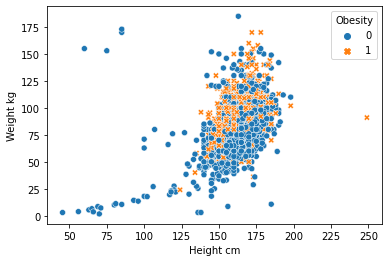

In [42]:
weight_df = data_df[['Obesity','Height cm','Weight kg']]

sns.scatterplot(data=weight_df,x='Height cm',y='Weight kg',hue='Obesity',style='Obesity')

Look that in the height between 50 and 100 cms, are some anormal heights. We'll check them

In [43]:
data_df[(data_df['Height cm']>50) & (data_df['Height cm']<100) & (data_df['Weight kg']>150)].\
    sort_values(['Height cm'])[['Age','Obesity','Height cm','Weight kg']]

,Age,Obesity,Height cm,Weight kg
5763,68.269711,0,60.0,155.0
1056,59.355086,0,75.0,153.0
178,33.172481,0,85.0,170.0
822,1.122542,0,85.0,173.0


In [44]:
# Add the hundred value
data_df.loc[5763,'Height cm'] = 160.0
data_df.loc[1056,'Height cm'] = 175.0
data_df.loc[178,'Height cm'] = 185.0

In [45]:
data_df[(data_df['Age']<2)].\
    sort_values(['Height cm'])[['Age','Obesity','Height cm','Weight kg']]

,Age,Obesity,Height cm,Weight kg
5605,0.454607,0,45.4,2.96
5621,0.531268,0,56.0,3.80
5600,0.547695,0,63.0,5.40
5602,1.078735,0,65.0,6.50
5626,0.829586,0,66.0,3.60
5593,0.971957,0,69.0,8.48
5622,1.905583,0,81.0,11.20
822,1.122542,0,85.0,173.00
5590,1.505963,0,128.0,38.40


In [46]:
# Correct the weight
data_df.loc[822,'Weight kg'] = 17.3

<AxesSubplot:xlabel='Height cm', ylabel='Weight kg'>

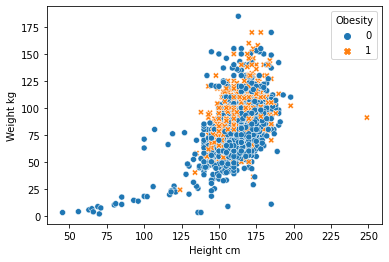

In [47]:
weight_df = data_df[['Obesity','Height cm','Weight kg']]

sns.scatterplot(data=weight_df,x='Height cm',y='Weight kg',hue='Obesity',style='Obesity')

In [48]:
weight_df['Weight kg'].count()

3292

### Fill the missing values

Sort the values of the dataframe by the column 'Height cm' so we can use the method 'bfill':
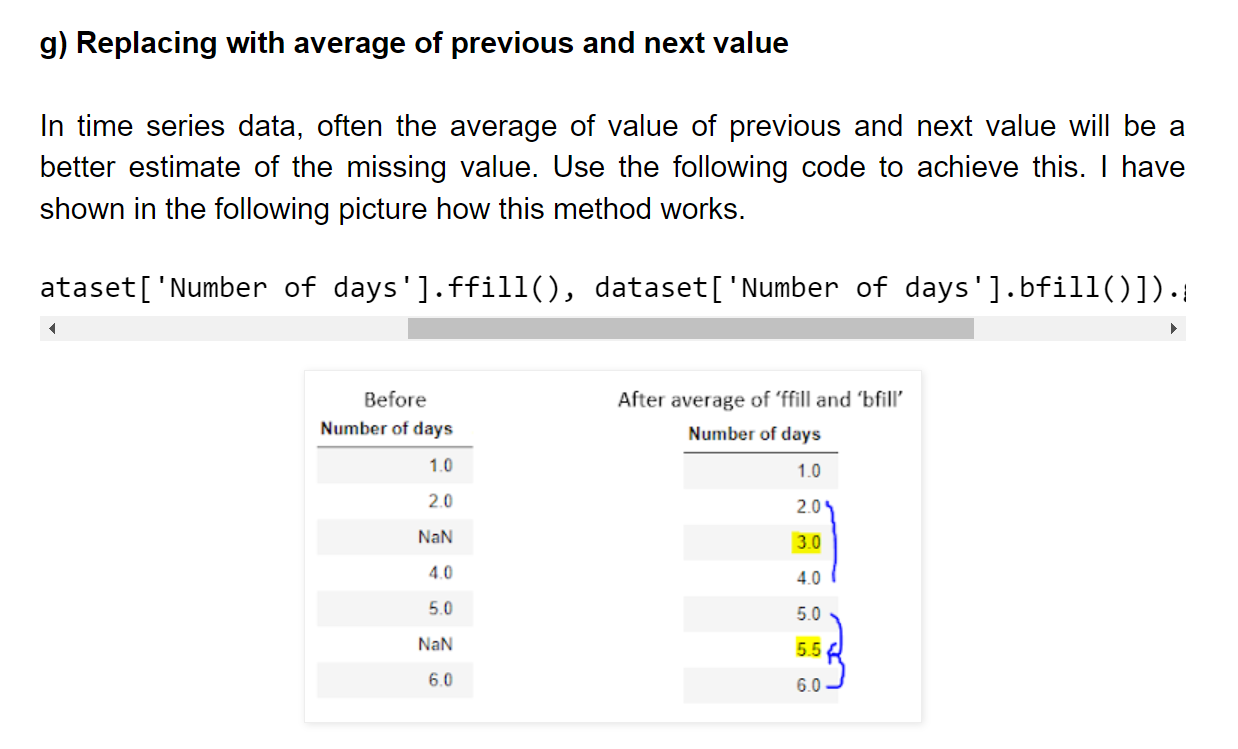

In [49]:
proof = data_df.sort_values('Height cm')

In [50]:
# proof[['Height cm','Weight kg']] = proof[['Height cm','Weight kg']].interpolate(method ='linear',axis=1)
proof['Weight kg'] = proof['Weight kg'].fillna(method='bfill')

<AxesSubplot:xlabel='Height cm', ylabel='Weight kg'>

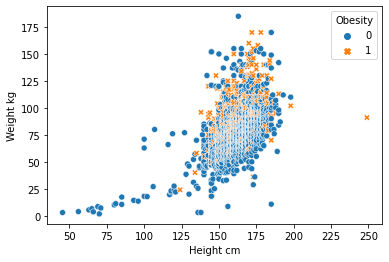

In [51]:
weight_df = proof[['Obesity','Height cm','Weight kg']]

sns.scatterplot(data=weight_df,x='Height cm',y='Weight kg',hue='Obesity',style='Obesity')

Now that we see that the Scatter Plot looks like the one we had before filling the values, we can fill the 'Weight kg' column

In [52]:
data_df['Weight kg'] = proof['Weight kg']
data_df['Weight kg'].count()

5377

<AxesSubplot:xlabel='Height cm', ylabel='Weight kg'>

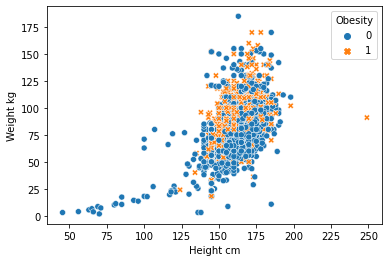

In [53]:
weight_df = data_df[['Obesity','Height cm','Weight kg']]

sns.scatterplot(data=weight_df,x='Height cm',y='Weight kg',hue='Obesity',style='Obesity')

In [54]:
data_df['Weight kg']

1       73.0
2       75.0
3       80.0
4       62.0
5       73.0
        ... 
6043    70.0
6045    89.0
6047    76.0
6054    75.0
6057    96.0
Name: Weight kg, Length: 5377, dtype: float64

In [55]:
proof['Weight kg'].sort_index()

1       73.0
2       75.0
3       80.0
4       62.0
5       73.0
        ... 
6043    70.0
6045    89.0
6047    76.0
6054    75.0
6057    96.0
Name: Weight kg, Length: 5377, dtype: float64

In [56]:
create_missing_df(data_df)

,Missing Count,Missing Percentage
Comorbilities,3022,56.202343


## Translate the Variables 

In [57]:
translate = ['PCR/Antigen','Sex',
             'Glasgow Coma Scale (points)',
             'Dosis of Dopamine (DA) or norepinephrine (NA)',
             'Maximum respiratory support during any time of the hospitalization']
for column in translate:
        null_values = data_df[column].isna().sum()
        count_data = data_df[column].value_counts()

        print(f'** \033[1m"{column}"\033[0m **')
        print(f'Null Values: {null_values}')
        print(count_data,end='\n\n')

** "PCR/Antigen" **
Null Values: 0
PCR        5264
Antigen     113
Name: PCR/Antigen, dtype: int64

** "Sex" **
Null Values: 0
Male      3350
Female    2027
Name: Sex, dtype: int64

** "Glasgow Coma Scale (points)" **
Null Values: 0
13 - 14 puntos    3911
15 Puntos         1246
<6 puntos          158
10 - 12 puntos      35
6 - 9 puntos        16
No aplica           11
Name: Glasgow Coma Scale (points), dtype: int64

** "Dosis of Dopamine (DA) or norepinephrine (NA)" **
Null Values: 0
No dosis                                   4822
DA >5 mcg/Kg/min o NA <=0.1 mcg/Kg/min:     386
DA >15 mcg/Kg/min o NA >0.1 mcg/Kg/min:     120
DA =<5 mcg/Kg/min o Dobutamina               49
Name: Dosis of Dopamine (DA) or norepinephrine (NA), dtype: int64

** "Maximum respiratory support during any time of the hospitalization" **
Null Values: 0
puntas nasales/mascarilla    2835
VMI                          1963
alto flujo                    570
VNI                             9
Name: Maximum respiratory 

**"PCR/Antigen"**
* "antígeno" to "Antigen"

**"Sex"**
* "Masculino" to "Male"
* "Femenino" to "Female"

**"Glasgow Coma Scale (points)"**
* "15 Puntos" to "15"
* "13 - 14 puntos" to "13 - 14"
* "10 - 12 puntos" to "10 - 12"
* "6 - 9 puntos" to "6 - 9"
* "<6 puntos" to "<6"

**"Dosis of Dopamine (DA) or norepinephrine (NA)"**
* "No aplica" to "Not apply"
* "DA >5 mcg/Kg/min o NA <=0.1 mcg/Kg/min:" to "DA >5 mcg/Kg/min or NA <=0.1 mcg/Kg/min"
* "DA >15 mcg/Kg/min o NA >0.1 mcg/Kg/min:" to "DA >15 mcg/Kg/min or NA >0.1 mcg/Kg/min"
* "DA =<5 mcg/Kg/min o Dobutamina" to "DA =<5 mcg/Kg/min or Dobutamine"

**"Maximum respiratory support during any time of the hospitalization"**
* "puntas nasales/mascarilla" to "Nasal cannula"
* "VMI" to "Invasive Mechanical Ventilation"
* "alto flujo" to "High Flow Nasal Oxygen"
* "VNI" to "Non-invasive Ventilation"

In [59]:
replace_values = {"antígeno": "Antigen",
                  "Masculino": "Male",
                  "Femenino": "Female",
                  "15 Puntos": "15",
                  "13 - 14 puntos": "13 - 14",
                  "10 - 12 puntos": "10 - 12",
                  "6 - 9 puntos": "6 - 9",
                  "<6 puntos": "<6",
                  "No aplica": "Not apply",
                  "DA >5 mcg/Kg/min o NA <=0.1 mcg/Kg/min:": "DA >5 mcg/Kg/min or NA <=0.1 mcg/Kg/min",
                  "DA >15 mcg/Kg/min o NA >0.1 mcg/Kg/min:": "DA >15 mcg/Kg/min or NA >0.1 mcg/Kg/min",
                  "DA =<5 mcg/Kg/min o Dobutamina": "DA =<5 mcg/Kg/min or Dobutamine",
                  "puntas nasales/mascarilla":"Nasal cannula",
                  "VMI":"Invasive Mechanical Ventilation",
                  "alto flujo":"High Flow Nasal Oxygen",
                  "VNI":"Non-invasive Ventilation"}

for column in data_df.columns.to_list():
    data_df = data_df.replace({column: replace_values})

## Outcome Column

In [60]:
null_values = data_df['Outcome'].isna().sum()
count_data = data_df['Outcome'].value_counts()

print(f'** \033[1m"Outcome"\033[0m **')
print(f'Null Values: {null_values}')
print(count_data,end='\n\n')

** "Outcome" **
Null Values: 0
Egreso a domicilio por mejoria         3002
Muerte                                 2355
Traslado a otra unidad hospitalaria      20
Name: Outcome, dtype: int64



In [61]:
replace_values = {"Egreso a domicilio por mejoria": "Discharge home for improvement",
                  "Muerte": "Death",
                  "Traslado a otra unidad hospitalaria": "Transfer to another hospital unit"}

for column in data_df.columns.to_list():
    data_df = data_df.replace({column: replace_values})

## Comorbilities column Analysis

In [62]:
data_df[data_df['Comorbilities'].isna()].head(5)

,Healthcare Center,Covid test negative,Covid test positive,PCR/Antigen,Inclusion: Positive COVID tests,Exclusion: No file,Birth Date,Age,Sex,Pregnancy,Admission date,Symptons onset,Comorbilities,Obesity,Diabetes Mellitus,Arterial Hypertension,Autoimmune Disease,Immunosuppression,Cancer,Smoking,Alcoholism,COPD (Chronic obstructive pulmonary disease),Interstitial Lung Disease (ILD),Tuberculosis,Asthma,Cardiovascular disease (CVD),Renal Disease,Hepatic Disease,Neurological Disease,Systemic Lupus Erythematosus (SLE),Rheumatoid Arthritis (RA),Scleroderma,Psoriasis,Inflammatory bowel disease,Vasculitis,HIV,Organ transplantation,Use of immunosuppressants,Primary Immunodeficiency,Splenectomy,Hematological Cancer,Active Cancer,Others (Cancer),Active Smoking,Years smoking,Cigarrettes per day,Vaccination,Temperature °C,Respiratory rate,Heart rate,Oximeter saturation,Systolic Blood Pressure,Diastolic blood pressure,Height cm,Weight kg,Glasgow Coma Scale (points),"Dopamine, norepinephrine, or dobutamine",Dosis of Dopamine (DA) or norepinephrine (NA),Mean arterial pressure,Use of oxygen before arrival,Administration of oxygen in any modality at any time during the hospital stay,Maximum respiratory support during any time of the hospitalization,IMV respiratory support,Pronation respiratory support,ECMO respiratory support,Date of intubation,Date of extubation,Peritoneal dialysis,Hemodialysis,Outcome,Leaving date,Stay length,Death with IMV,Cause of death during IMV (choice=acute myocardial infarction),Cause of death during IMV (choice=Respiratory failure due to COVID),Cause of death during IMV (choice=TIA),Cause of death during IMV (choice=Sudden death not specified),Cause of death during IMV (choice=pulmonary thromboembolism),Cause of death during IMV (choice=Sepsis),Cause of death during IMV (choice=Nosocomial infection),Cause of death during IMV (choice=Other),"Cause of death during IMV (choice=Sudden Death(Massive TIA, Heart Attack, Pulmonary Embolism))",Cause of death during IMV (choice=Rejected Intubation or Terminal Disease),Cause of death during IMV (choice=Fan Unavailability),Cause of death during IMV (choice=Others),Died in the first 24 hours of hospitalization
346,HJM,0,1,PCR,1,0,1984-06-02,37.090426,Female,0,2021-02-24,8.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,36.8,24.0,107.0,79.0,110.0,70.0,158.0,68.0,15,0,No dosis,83.333333,1,0,Nasal cannula,0,0,0,0,0,0,0,Discharge home for improvement,2021-03-04,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1491,HRAEI,0,1,PCR,1,0,1974-09-02,47.070097,Male,0,2020-01-04,7.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,36.5,18.0,87.0,93.0,115.0,85.0,175.0,95.0,13 - 14,0,No dosis,95.000000,1,0,Nasal cannula,0,0,0,0,0,0,0,Discharge home for improvement,2020-01-12,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1492,HRAEI,0,1,PCR,1,0,1977-12-12,43.795560,Male,0,2020-01-10,13.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,36.2,19.0,75.0,92.0,128.0,80.0,180.0,80.0,13 - 14,0,No dosis,96.000000,1,0,Invasive Mechanical Ventilation,1,0,0,2020-03-11,2020-01-14,0,0,Death,2020-01-14,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1493,HRAEI,0,1,PCR,0,0,1986-04-01,35.450420,Male,0,2019-12-30,6.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,36.7,17.0,89.0,90.0,135.0,95.0,145.0,60.0,13 - 14,0,No dosis,108.333333,1,0,Nasal cannula,0,0,0,0,0,0,0,Death,2020-01-03,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1494,HRAEI,0,1,PCR,0,0,1971-11-01,49.920258,Male,0,2020-01-19,8.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,36.7,15.0,90.0,95.0,141.0,87.0,171.0,107.6,13 - 14,0,No dosis,105.000000,1,0,Nasal cannula,0,0,0,0,0,0,0,Death,2020-01-24,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
len(data_df[data_df['Comorbilities'].isna()])

3022

To fill this column, we have to check if the comorbilities columns were selected in the survey.

In [64]:
comorbilities = 'Obesity	Diabetes Mellitus	Arterial Hypertension	Autoimmune Disease	Immunosuppression	Cancer	Smoking	Alcoholism	COPD (Chronic obstructive pulmonary disease)	Interstitial Lung Disease (ILD)	Tuberculosis	Asthma	Cardiovascular disease (CVD)	Renal Disease	Hepatic Disease	Neurological Disease	Systemic Lupus Erythematosus (SLE)	Rheumatoid Arthritis (RA)	Scleroderma	Vasculitis	HIV	Organ transplantation	Use of immunosuppressants	Primary Immunodeficiency	Hematological Cancer	Active Cancer	Others (Cancer)'
comorbilities_list = comorbilities.split('	')
print(comorbilities_list)

['Obesity', 'Diabetes Mellitus', 'Arterial Hypertension', 'Autoimmune Disease', 'Immunosuppression', 'Cancer', 'Smoking', 'Alcoholism', 'COPD (Chronic obstructive pulmonary disease)', 'Interstitial Lung Disease (ILD)', 'Tuberculosis', 'Asthma', 'Cardiovascular disease (CVD)', 'Renal Disease', 'Hepatic Disease', 'Neurological Disease', 'Systemic Lupus Erythematosus (SLE)', 'Rheumatoid Arthritis (RA)', 'Scleroderma', 'Vasculitis', 'HIV', 'Organ transplantation', 'Use of immunosuppressants', 'Primary Immunodeficiency', 'Hematological Cancer', 'Active Cancer', 'Others (Cancer)']


In [65]:
data_df[data_df['Comorbilities'].isna()][comorbilities_list].head(3)

,Obesity,Diabetes Mellitus,Arterial Hypertension,Autoimmune Disease,Immunosuppression,Cancer,Smoking,Alcoholism,COPD (Chronic obstructive pulmonary disease),Interstitial Lung Disease (ILD),Tuberculosis,Asthma,Cardiovascular disease (CVD),Renal Disease,Hepatic Disease,Neurological Disease,Systemic Lupus Erythematosus (SLE),Rheumatoid Arthritis (RA),Scleroderma,Vasculitis,HIV,Organ transplantation,Use of immunosuppressants,Primary Immunodeficiency,Hematological Cancer,Active Cancer,Others (Cancer)
346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This means that we have to check if any of the comorbilities in the $comorbilities\_list$ was selected by making a sum of each one of it's values since they are boolean. If the sum is more than 1, then the patient has a comorbility.

In [66]:
# Use the value_counts function to check if there are more than 0s in the sum
data_df[data_df['Comorbilities'].isna()][comorbilities_list].sum(axis=1).value_counts()

0    3022
dtype: int64

Notice that none of the rows with missing values has any disease, which tells that we can replace the NaN values with 0 -> No Comorbilities.

In [67]:
# Fill with 0
data_df['Comorbilities'] = data_df['Comorbilities'].fillna(0)
data_df['Comorbilities'] = data_df['Comorbilities'].astype(int)

In [68]:
create_missing_df(data_df)

,Missing Count,Missing Percentage


## Convert *Date* Columns to DateTime Type

In [69]:
data_df.filter(regex=("[Dd]ate")).head()

,Birth Date,Admission date,Date of intubation,Date of extubation,Leaving date
1,1969-11-14,2021-03-20,2021-03-20,2021-04-12,2021-04-12
2,1981-09-03,2021-03-10,2021-03-10,2021-03-24,2021-04-02
3,1975-06-10,2020-05-12,2020-05-13,2020-06-20,2020-06-28
4,1964-09-08,2021-03-11,2021-03-11,2021-03-25,2021-04-02
5,1980-08-02,2021-01-23,2021-01-23,2021-02-25,2021-03-16


In [70]:
data_df.filter(regex=("[Dd]ate")).dtypes

Birth Date            object
Admission date        object
Date of intubation    object
Date of extubation    object
Leaving date          object
dtype: object

In [71]:
dates_columns=data_df.filter(regex=("[Dd]ate")).columns.to_list()
print(dates_columns)

['Birth Date', 'Admission date', 'Date of intubation', 'Date of extubation', 'Leaving date']


In [72]:
for column in dates_columns:
    data_df[column] = pd.to_datetime(data_df[column])

In [73]:
data_df[dates_columns].dtypes

Birth Date            datetime64[ns]
Admission date        datetime64[ns]
Date of intubation    datetime64[ns]
Date of extubation    datetime64[ns]
Leaving date          datetime64[ns]
dtype: object

In [74]:
data_df[dates_columns].head(4)

,Birth Date,Admission date,Date of intubation,Date of extubation,Leaving date
1,1969-11-14,2021-03-20,2021-03-20,2021-04-12,2021-04-12
2,1981-09-03,2021-03-10,2021-03-10,2021-03-24,2021-04-02
3,1975-06-10,2020-05-12,2020-05-13,2020-06-20,2020-06-28
4,1964-09-08,2021-03-11,2021-03-11,2021-03-25,2021-04-02


# Cleaned DataFrame

In [75]:
data_df.head(4)

,Healthcare Center,Covid test negative,Covid test positive,PCR/Antigen,Inclusion: Positive COVID tests,Exclusion: No file,Birth Date,Age,Sex,Pregnancy,Admission date,Symptons onset,Comorbilities,Obesity,Diabetes Mellitus,Arterial Hypertension,Autoimmune Disease,Immunosuppression,Cancer,Smoking,Alcoholism,COPD (Chronic obstructive pulmonary disease),Interstitial Lung Disease (ILD),Tuberculosis,Asthma,Cardiovascular disease (CVD),Renal Disease,Hepatic Disease,Neurological Disease,Systemic Lupus Erythematosus (SLE),Rheumatoid Arthritis (RA),Scleroderma,Psoriasis,Inflammatory bowel disease,Vasculitis,HIV,Organ transplantation,Use of immunosuppressants,Primary Immunodeficiency,Splenectomy,Hematological Cancer,Active Cancer,Others (Cancer),Active Smoking,Years smoking,Cigarrettes per day,Vaccination,Temperature °C,Respiratory rate,Heart rate,Oximeter saturation,Systolic Blood Pressure,Diastolic blood pressure,Height cm,Weight kg,Glasgow Coma Scale (points),"Dopamine, norepinephrine, or dobutamine",Dosis of Dopamine (DA) or norepinephrine (NA),Mean arterial pressure,Use of oxygen before arrival,Administration of oxygen in any modality at any time during the hospital stay,Maximum respiratory support during any time of the hospitalization,IMV respiratory support,Pronation respiratory support,ECMO respiratory support,Date of intubation,Date of extubation,Peritoneal dialysis,Hemodialysis,Outcome,Leaving date,Stay length,Death with IMV,Cause of death during IMV (choice=acute myocardial infarction),Cause of death during IMV (choice=Respiratory failure due to COVID),Cause of death during IMV (choice=TIA),Cause of death during IMV (choice=Sudden death not specified),Cause of death during IMV (choice=pulmonary thromboembolism),Cause of death during IMV (choice=Sepsis),Cause of death during IMV (choice=Nosocomial infection),Cause of death during IMV (choice=Other),"Cause of death during IMV (choice=Sudden Death(Massive TIA, Heart Attack, Pulmonary Embolism))",Cause of death during IMV (choice=Rejected Intubation or Terminal Disease),Cause of death during IMV (choice=Fan Unavailability),Cause of death during IMV (choice=Others),Died in the first 24 hours of hospitalization
1,INER,0,1,PCR,1,0,1969-11-14,51.768346,Male,0,2021-03-20,6.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,36.5,50.0,113.0,76.0,127.0,81.0,163.0,73.0,15,0,No dosis,96.333333,0,0,Invasive Mechanical Ventilation,0,1,0,2021-03-20,2021-04-12,0,0,Death,2021-04-12,23.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,INER,0,1,PCR,1,0,1981-09-03,39.992608,Male,0,2021-03-10,8.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,37.4,36.0,100.0,87.0,130.0,83.0,168.0,75.0,15,0,No dosis,98.666667,1,0,Invasive Mechanical Ventilation,0,1,0,2021-03-10,2021-03-24,0,1,Discharge home for improvement,2021-04-02,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,INER,0,1,PCR,1,0,1975-06-10,45.451994,Male,0,2020-05-12,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,38.5,38.0,113.0,95.0,110.0,67.0,170.0,80.0,15,1,DA >5 mcg/Kg/min or NA <=0.1 mcg/Kg/min,81.333333,0,0,Invasive Mechanical Ventilation,0,1,0,2020-05-13,2020-06-20,0,0,Discharge home for improvement,2020-06-28,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,INER,0,1,PCR,1,0,1964-09-08,56.981321,Male,0,2021-03-11,8.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,36.0,36.0,130.0,54.0,140.0,80.0,155.0,62.0,15,0,No dosis,100.000000,1,0,Invasive Mechanical Ventilation,0,1,0,2021-03-11,2021-03-25,0,0,Discharge home for improvement,2021-04-02,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
create_missing_df(data_df)

,Missing Count,Missing Percentage


In [77]:
# Save the "cleaned" csv, further cleaning process will be done
path_to_save = '../Resources/patients_clean.csv'
data_df.to_csv(path_to_save,index = False)